In [20]:
# Importando as bibliotecas necessárias

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [9]:
#Realizando a leitura do database
with open('facebook_combined.txt', 'r') as file:
    lines = file.readlines()
G = nx.Graph()
for line in lines:
    node1, node2 = map(int, line.strip().split())
    G.add_edge(node1, node2)



In [11]:
#Lendo a distribuição do degree
degree_distribution = list(dict(G.degree()).values())

In [57]:
# Numeros de nos e arestas
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Grau medio
grau_medio = sum(dict(G.degree()).values()) / num_nodes


print(f"Quantidade de nos: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")
print(f"Grau Medio: {grau_medio:.2f}")


Quantidade de nos: 4039
Quantidade de arestas: 88234
Grau Medio: 43.69


In [14]:
#Densidade do grafo
density = nx.density(G)
print(f"Densidade do grafo: {density:.4f}")


Densidade do grafo: 0.0108


In [15]:
#Sequencia de nos com maior numero de grau
sequencia_grau = sorted([d for n, d in G.degree()], reverse=True)
print("Sequencia de grau:", sequencia_grau)


Sequencia de grau: [1045, 792, 755, 547, 347, 294, 291, 254, 245, 235, 234, 234, 231, 229, 226, 224, 223, 222, 221, 220, 217, 211, 210, 209, 207, 207, 207, 205, 205, 205, 205, 204, 203, 203, 202, 202, 201, 201, 201, 201, 200, 199, 199, 198, 198, 198, 198, 198, 197, 197, 197, 196, 196, 195, 195, 195, 195, 194, 193, 193, 193, 192, 192, 191, 191, 191, 191, 190, 190, 190, 190, 190, 190, 189, 189, 189, 188, 188, 188, 188, 187, 187, 187, 187, 186, 186, 186, 186, 185, 185, 185, 185, 184, 184, 184, 183, 183, 183, 182, 182, 182, 182, 182, 181, 181, 180, 180, 179, 179, 179, 178, 178, 178, 178, 178, 177, 177, 177, 177, 176, 176, 176, 176, 175, 175, 174, 174, 173, 173, 173, 173, 173, 173, 172, 172, 172, 171, 171, 171, 170, 170, 170, 169, 169, 169, 168, 168, 168, 168, 168, 167, 167, 166, 166, 166, 166, 165, 165, 165, 165, 165, 164, 164, 164, 164, 163, 162, 162, 161, 161, 161, 161, 160, 160, 160, 160, 160, 160, 159, 159, 159, 158, 158, 158, 158, 158, 157, 156, 156, 156, 156, 156, 156, 155, 155, 155,

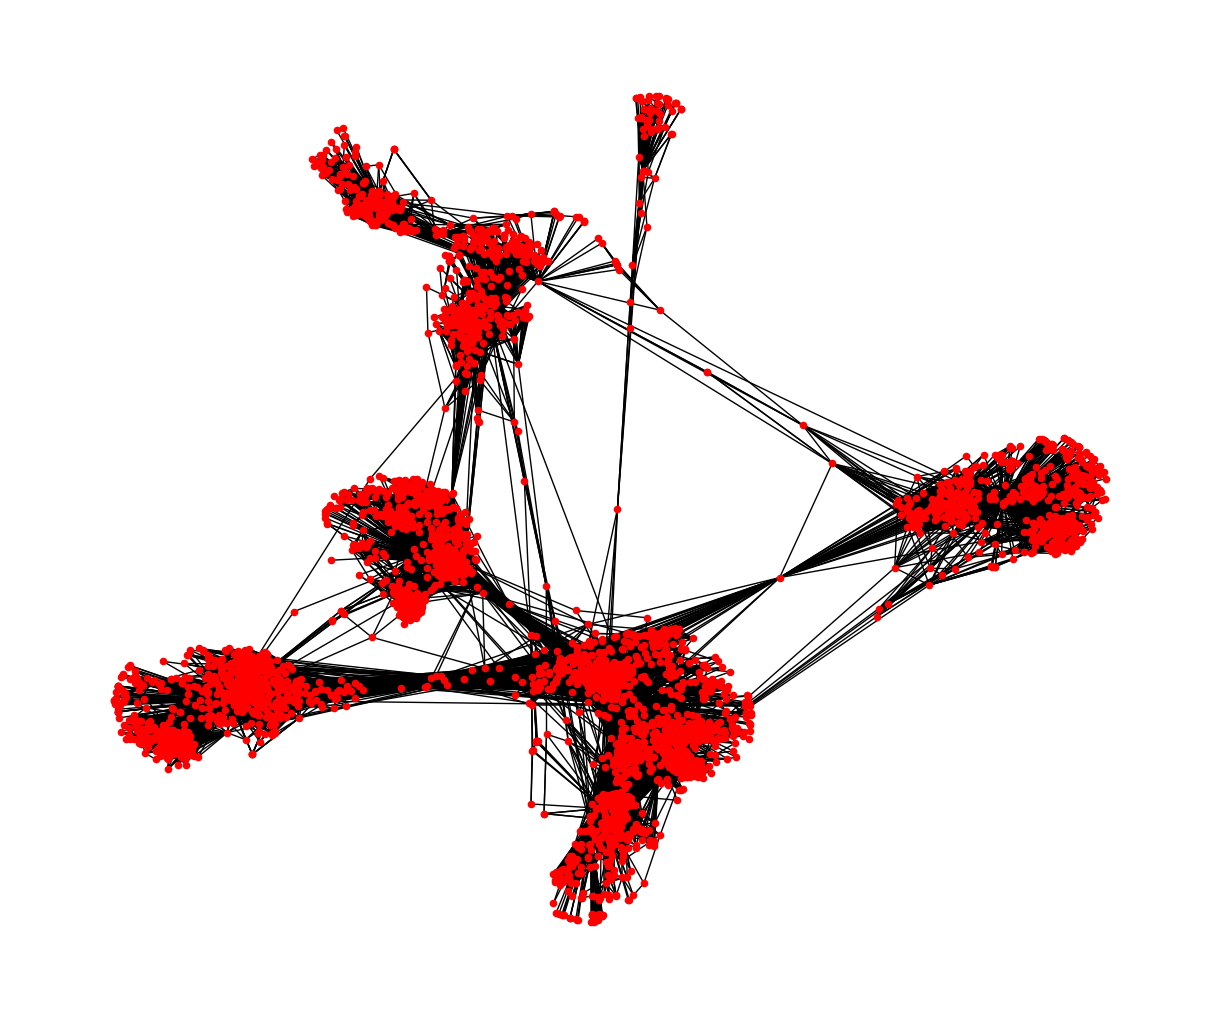

In [41]:
#Aumentando o tamanho da figura usando matplotlib
plt.figure(figsize=(12,10))
#criando o layout da rede
spring_pos = nx.spring_layout(G)
#desenhando a rede
nx.draw(G, node_size=20, pos = spring_pos, node_color = 'red')

In [51]:
#Detectando possiveis comunidades graças ao agrupamento gerado pelo grafo

!pip install python-louvain

#importando nosso algoritmo de detecção de comunidades
from community import community_louvain

#computar os grupos
partitions = community_louvain.best_partition(G)

#Transformando os valores em lista
values = list(partitions.values())

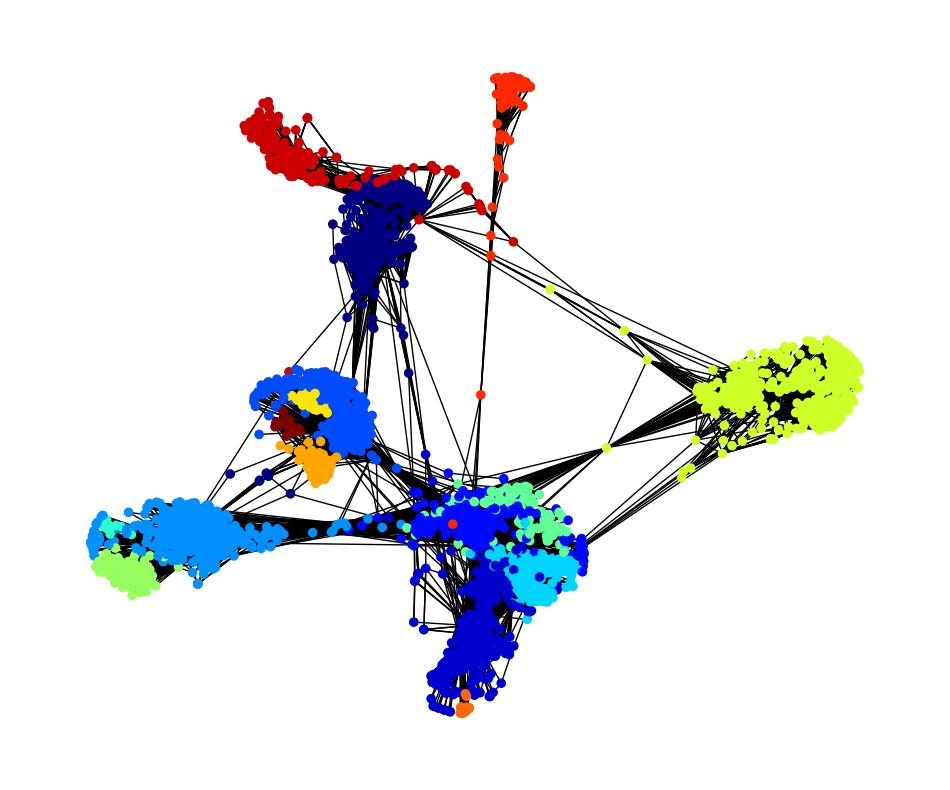

In [52]:
#Definindo o tamanho da imagem
plt.figure(figsize=(12,10))
plt.axis("off")

#Mostrando as diferentes comunidades identificadas separada por cor

nx.draw_networkx(G, pos = spring_pos, cmap=plt.get_cmap("jet"),
                  node_color=values, node_size = 35, with_labels = False)

In [53]:
#Separando uma comunidade atraves do algoritmo
#Listando o numero de comunidades
list(set(values))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [54]:
#Separando uma comunidade e mostrando a rede de relações
#Nesse caso separei a comunidade 0

cluster_id = 0


cluster = [node for node in G.nodes() if partitions[node] == cluster_id]

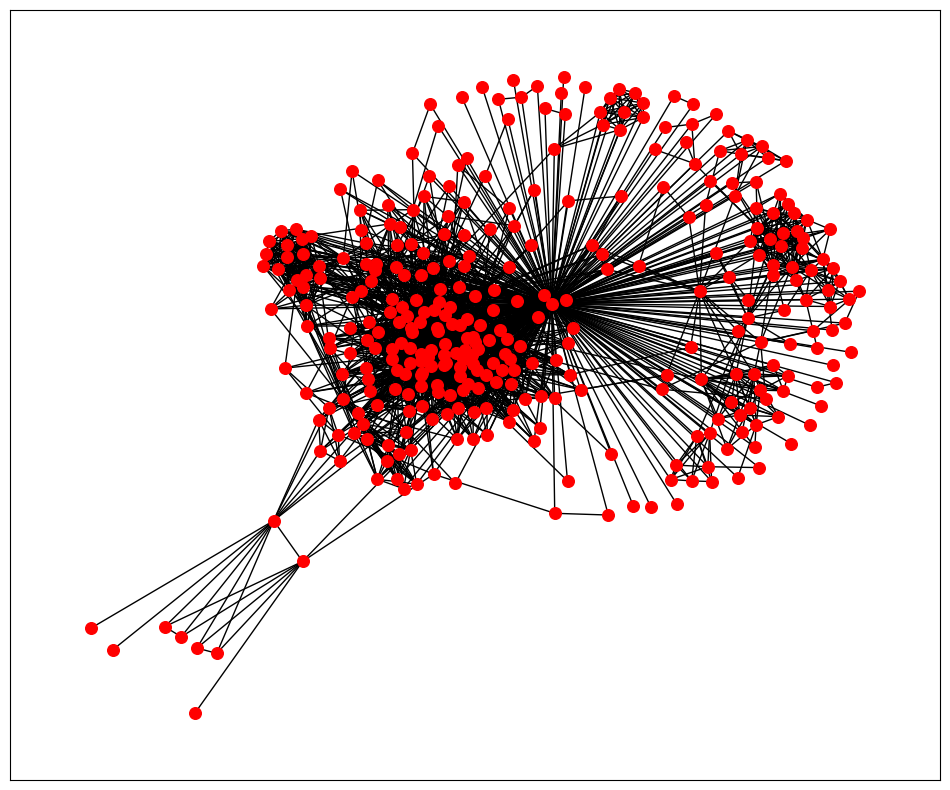

In [55]:
# criando um subgrafo passando os nos selecionados
cluster = G.subgraph(cluster)

plt.figure(figsize=(12,10))

nx.draw_networkx(cluster , node_color='red',
                 node_size=70, with_labels=False)

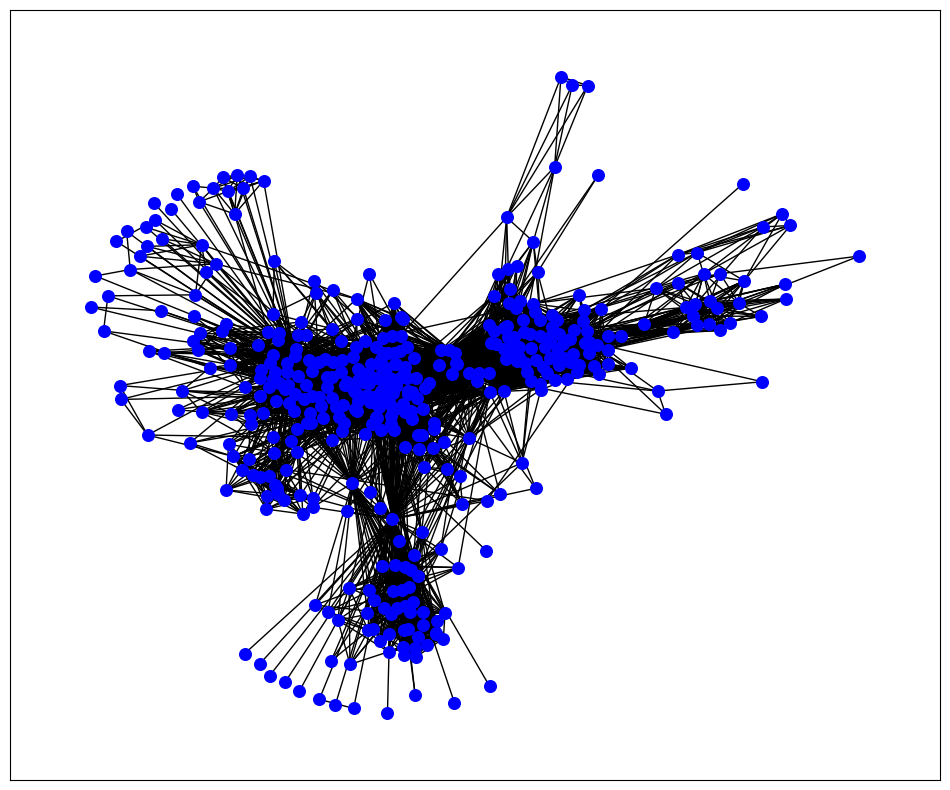

In [56]:
#Separando uma comunidade e mostrando a rede de relações
#Nesse caso separei a comunidade 1

cluster_id = 1


cluster = [node for node in G.nodes() if partitions[node] == cluster_id]


#Criando um subgrafo passando os nos selecionados
cluster = G.subgraph(cluster)

plt.figure(figsize=(12,10))

nx.draw_networkx(cluster , node_color='blue',
                 node_size=70, with_labels=False)

In [ ]:
#Conclusões Finais:


# Pegando como exemplo qualquer uma das comunidades que podem ser mostradas (0 - 15),
# Poderiamos criar um fluxo de informação de caracteristicas somente a essa comunidade que possuem caracteristicas em comum
# Seja: compras, pontos de interesses: politica, economia, esportes.

# Graças a uma simples analise de um grafo fornecido pela conectividade entre usuarios da rede facebook.



#Considerações:

#Tentei executar diferentes formas de layout no grafo que escolhi do facebook, contudo aparentemente por ser um grafo muito grande ele fica de maneira borrada
#Ou seja, os nós permanecem muito unidos.